In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.0e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e17]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandX1],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 36.711164 seconds (189.11 M allocations: 39.005 GiB, 11.07% gc time)


3.0

In [4]:
foreach(x->println(Ts[x]," ",Efs[x,1,1,]-Eoff),1:length(Ts))

300.0 -0.07774318676740588
310.0 -0.08199265467267125
320.0 -0.086303930136169
330.0 -0.09067330858360378
340.0 -0.09509578656652273
350.0 -0.09956421191153186
360.0 -0.10406804180207274
370.0 -0.1085916218762053
380.0 -0.11311196516011979
390.0 -0.11759617940741318
400.0 -0.12199901962743187
410.0 -0.12626152913610333
420.0 -0.1303121965759857
430.0 -0.1340720217168876
440.0 -0.13746375681142542
450.0 -0.14042339257658476
460.0 -0.14291002008251485
470.0 -0.1449103898644557
480.0 -0.14643705974194088
490.0 -0.14752196916202287
500.0 -0.1482085193763858
510.0 -0.14854459358275918
520.0 -0.14857759194224585
530.0 -0.14835149499260947
540.0 -0.14790549432212607
550.0 -0.14727363695872864
560.0 -0.14648492242961986
570.0 -0.14556390349541726
580.0 -0.14453121783670309
590.0 -0.1434041629982099
600.0 -0.14219722462366313
610.0 -0.14092253978654856
620.0 -0.1395902924633754
630.0 -0.1382090455637055
640.0 -0.1367860169353241
650.0 -0.13532730748176114
660.0 -0.13383808914066897
670.0 -0.132

In [5]:
plot(Ts,Efs[:,1,1]-Eoff,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

MethodError: MethodError: no method matching -(::Array{Float64,1}, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:397
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  ...

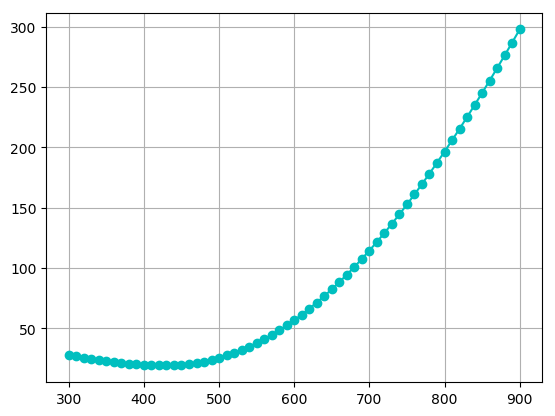

In [6]:
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [7]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

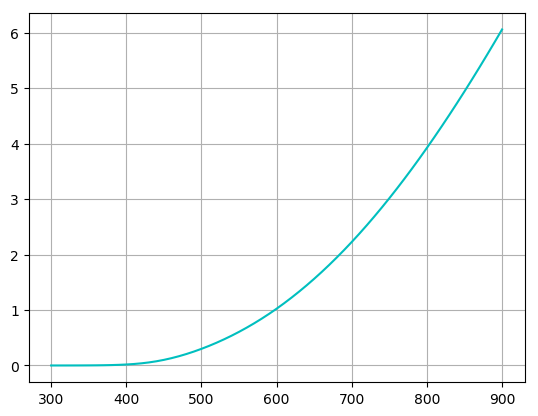

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
#ylim(0,7)
grid()

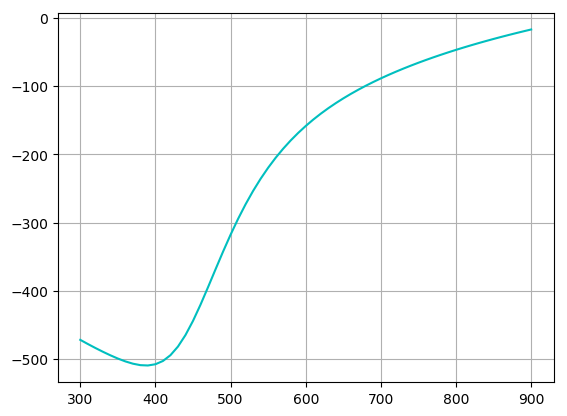

In [9]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
#plot(Ts,seebeckes[:,1,1]*1e6,linestyle="-",color="y")
#plot(Ts,seebeckhs[:,1,1]*1e6,linestyle="-",color="k")
#ylim(-250,-0)
grid()

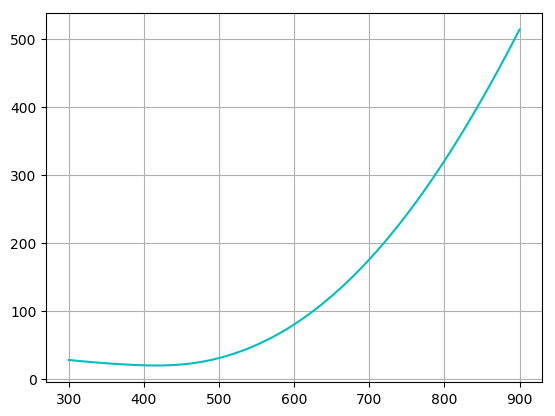

In [10]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
#ylim(0,3500)
grid()

In [11]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [12]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);
#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]  
    thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
    thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
    #println("2")
    tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
    tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22]) 

    tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
    tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

    tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
    tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

    tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
    tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

    tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[21])
    tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[22])

    tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
    tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
    #println("3")

    tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
    tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

    tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
    tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
    tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf

    tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
    tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf#

    tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
    tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
    #println("4")
    tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
    tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    return (vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)
end
xmax=1.0

1.0

In [13]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.6,0.65,0.0)
klsM=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,klsM[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,
        tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(klsM[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [14]:
foreach(x->println(klsM[x,1,1]),1:length(Ts))

0.8544418125678096
0.8376899857984905
0.8215825554299149
0.8061090833545528
0.7912565885493161
0.7770100717292688
0.7633529445128749
0.750267388238147
0.7377346593330373
0.7257353526150577
0.7142496303367424
0.7032574225605436
0.692738602925707
0.6826731424932334
0.6730412428255477
0.6638234481056821
0.6550007358120016
0.6465545867114065
0.6384670368604316
0.6307207153939182
0.6232988715378724
0.6161853931636596
0.6093648182006149
0.6028223397058877
0.596543805264769
0.5905157113940244
0.584725193501048
0.5791600125806428
0.573808538828128
0.568659733068622
0.5637031265081655
0.5589287992929961
0.5543273582919238
0.549889914450873
0.5456080600095504
0.5414738458179867
0.537479758945293
0.5336187007337395
0.52988396541775
0.5262692193988979
0.5227684812439644
0.5193761024530019
0.5160867490275995
0.512895383855757
0.5097972499185106
0.5067878543143162
0.5038629530899364
0.5010185368608507
0.4982508171997882
0.49555621376868525
0.49293134216696216
0.49037300246738863
0.48787816840977954


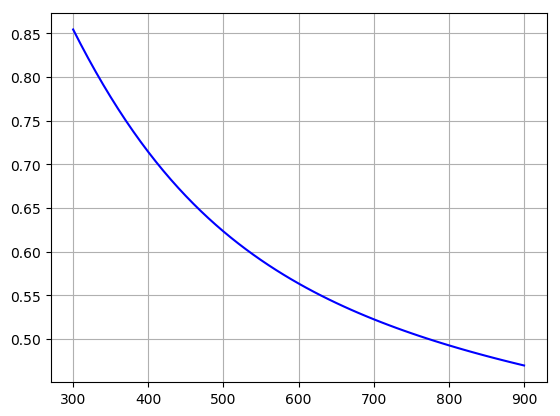

In [15]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
grid()

In [16]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.0,0.65,0.0)
kls0=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls0[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(kls0[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [17]:
foreach(x->println(kls0[x,1,1]),1:length(Ts))

5.762164765986154
5.616570104083581
5.476602878578155
5.34209516150399
5.2128607146267525
5.088702204516006
4.969416619594072
4.854799308021804
4.744646957363269
4.638759762987944
4.536942976269761
4.439007981248429
4.344773015582954
4.254063624730432
4.166712914668342
4.082561648043986
4.001458214274083
3.9232584983593792
3.8478256736230114
3.7750299439661963
3.704748257621054
3.636864007931844
3.571266730566034
3.5078518024623704
3.4465201457323364
3.3871779386031964
3.3297363340546977
3.2741111898469466
3.2202228081155506
3.1679956865509666
3.117358281228333
3.068242781218144
3.020584894929217
2.9743236479954795
2.929401192412166
2.8857626265503007
2.843355825625021
2.8021312821591713
2.762041955964115
2.7230431331519456
2.685092293694083
2.648148987048718
2.6121747153917725
2.5771328240016174
2.542988398365781
2.5097081675972253
2.4772604137680214
2.445614886788796
2.4147427244828332
2.3846163775238303
2.3552095389260437
2.3264970777944063
2.298454977060486
2.271060274947439
2.2442

In [18]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(1.0,0.5,0.0)
kls1=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls1[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
   # println("T=", iTx, " kl= " ,round(kls1[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [19]:
foreach(x->println(kls1[x,1,1]),1:length(Ts))

3.326578993473054
3.2744291155275014
3.223606190150995
3.1740942957121487
3.1258716759613754
3.078912287686695
3.0331870086130057
2.988664580309532
2.9453123436238493
2.903096811338765
2.86198411328161
2.8219403421503286
2.782931822981746
2.744925324432734
2.707888224938497
2.6717886413866654
2.63659552378538
2.6022787183934675
2.568809003669418
2.536158105575729
2.50429869903155
2.4732044007175644
2.4428497563883025
2.4132102243468547
2.3842621560060033
2.355982774103074
2.328350148457392
2.301343171279309
2.274941530778541
2.249125684313588
2.223876831242982
2.1991768857564318
2.1750084499126094
2.1513547870643808
2.1281997958122134
2.1055279845929147
2.083324446982732
2.061574837770869
2.0402653498407735
2.0193826918814026
1.998914066938627
1.9788471518073463
1.9591700772572886
1.9398714090796323
1.9209401299370834
1.902365621996638
1.8841376503217784
1.8662463469991424
1.8486821959735058
1.8314360185642524
1.8144989596362937
1.7978624743982554
1.781518315801159
1.7654585225111508
1

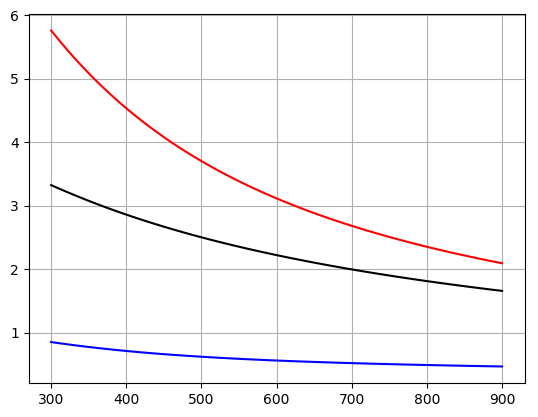

In [20]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")

plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [21]:
yaa=0.6
aMgSi=6.39e-10
aMgSn=6.77e-10

6.77e-10

In [22]:
ks=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klsT=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.25
for (iT,iTx) in enumerate(Ts)  
    klsT[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       ks[iT,1,1]=klsT[iT,1,1]+kes[iT,1,1]+kbis[iT,1,1,] 
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [23]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

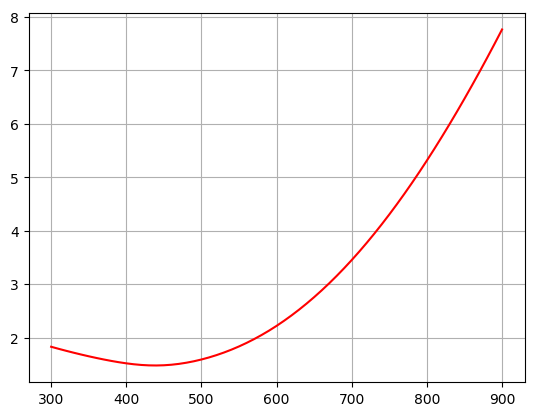

In [24]:
figure()
#semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
#plot(Ts,kls0[:,1,1],linestyle="-",color="b")
#plot(Ts,kls1[:,1,1],linestyle="-",color="c")
#plot(Ts,klsM[:,1,1],linestyle="-",color="k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#ylim(0,4.5)
grid(true)
#kes,kees,kehs,kbis

In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [26]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

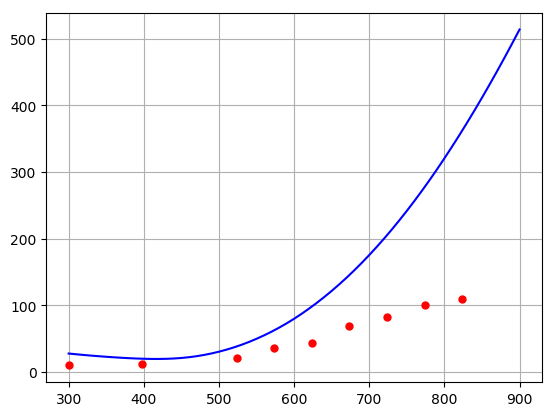

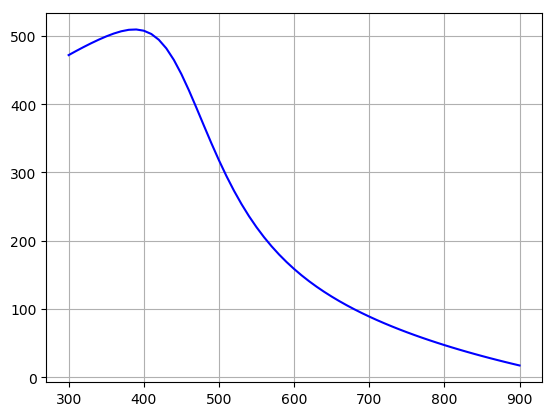

In [27]:

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

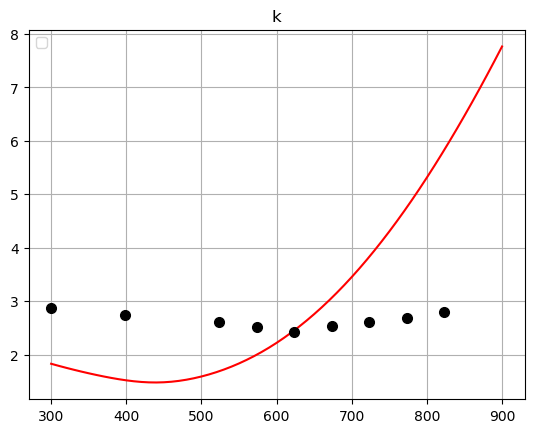

No handles with labels found to put in legend.


In [28]:
figure()
title("k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
#plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
#plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
#plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
#plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
#plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="4 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
#ylim(1.5,5.0)
grid()

In [29]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [30]:
foreach(x->println(ks[x,1,1]),1:length(Ts))

1.8274345278662694
1.7888194743515968
1.7516625138381599
1.7159780488815566
1.6818018558381216
1.6492049773699173
1.6183108581782863
1.589315522228925
1.562509176423864
1.5382950977621717
1.517197970196929
1.4998501521425027
1.4869639914599289
1.4792028237212866
1.4771066369363985
1.4810115673841915
1.4910157120434875
1.507026057423794
1.528847501271152
1.5562714051379638
1.5891343652042718
1.6273420056527024
1.6708677601347697
1.719739457149286
1.7740229820577935
1.8338076901200213
1.8991943648369487
1.9702877533698966
2.047190824592405
2.130001208233394
2.2188089932098265
2.3144001973931463
2.415769470082198
2.523219561587274
2.636870295352488
2.756787186443686
2.8830147580971826
3.0155837578880895
3.154513801691791
3.2998147065659937
3.451487341812037
3.6095242721938283
3.77391029997151
3.944622952184633
4.121632935044914
4.304904566280065
4.4943961909608605
4.690060583640035
4.891845338196962
5.0996932460041
5.3140726905619085
5.534047358171459
5.7598094969519975
5.991325888076149


In [36]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.015261572752062883
0.015210038191674805
0.015141846142768194
0.015060529306572899
0.01497009946538368
0.014875538191635685
0.014783487859773793
0.014703178722528742
0.014647600454142751
0.014634861948769009
0.01468956478601327
0.014843846556296322
0.015146085683658822
0.01563693065989162
0.01636484611831962
0.017381838466748768
0.018736084759403207
0.020470494625449448
0.022622455809583816
0.0252248550395915
0.028307650776696558
0.03189936251871406
0.03602816603502321
0.04072255238594963
0.046011633413875735
0.051925212456736536
0.05849378293279578
0.06574834410259395
0.0737202730541256
0.08244117302260823
0.09194273074919668
0.10243054239684946
0.11367616806758996
0.1257671377439773
0.1387498810258737
0.15265992954681606
0.16752970913971044
0.18339011018569928
0.20027097876610012
0.21820130233541501
0.23720928609649228
0.25732238485465353
0.27856731555954517
0.3009700614823041
0.324555873142111
0.34934926847668546
0.37537403348995824
0.4026532239690104
0.4312091685256414
0.461063473

In [37]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

1.8121074966173305
1.7734757057712374
1.7362586333319685
1.7004232737171432
1.6659315158303216
1.6327417137607683
1.6008098975790264
1.5700907097565793
1.5405381309999362
1.512106043409015
1.4847486673594228
1.4584209001518111
1.4330785781616668
1.4086786789143004
1.3851794745051245
1.3625406433221514
1.340723344348547
1.3196902583436496
1.299405601916427
1.2798351216176644
1.2609460744443381
1.2427071992351069
1.2250886816045465
1.208062113938261
1.191600451504475
1.1756779655404046
1.160270193806664
1.1453538902337637
1.130906973401947
1.1169084749477864
1.1033384883038058
1.0901781181847756
1.0774094311501958
1.0650154074984708
1.0529798946847486
1.0412875624008342
1.029923859410978
1.0188749722006265
1.0081277854652932
0.9976698444425789
0.9874893190711197
0.9775749699451542
0.9679161160216803
0.9585026040283742
0.9493247795140025
0.940373459478519
0.9316399065171551
0.9231158044111831
0.9147932350974504
0.9066646569490384
0.8987228843003234
0.8909610681511091
0.8833726779863278
0.

In [38]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

6.54584968759455e-5
0.0001337303886846484
0.0002620343634232066
0.0004942458578405893
0.0009002405424162997
0.0015877254175133712
0.002717472739486146
0.004521633749817103
0.007323444969785218
0.011554192404387622
0.017759738051492904
0.026585405434395304
0.03873932761460325
0.05488721414709465
0.0755623163129544
0.10108908559529119
0.13155628293553737
0.16686530445469475
0.20681944354514123
0.251211428480708
0.29988063998323694
0.35273544389888145
0.40975091249519996
0.47095479082507546
0.5364108971394428
0.60620451212288
0.6804303880974889
0.7591855190335391
0.8425635781363326
0.9306515602629993
1.023527774156824
1.121791536811521
1.224683870864412
1.332437016344826
1.4451405196418654
1.5628396944960357
1.6855611895464941
1.8133186755017636
1.9461150374603973
2.0839435597879996
2.226788736644425
2.3746269173940204
2.5274268683902847
2.685150286673955
2.8477522823888006
3.0151818383248603
3.187382250953747
3.364291555259841
3.5458429345738702
3.7319651160199747
3.9229257064269585
4.11

In [39]:
foreach(x->println(sigmas[x,1,1]/100),1:length(Ts))

27.91544417329677
26.809307046113123
25.773167505816776
24.803249298780088
23.89742734626593
23.055710045444997
22.280905122826756
21.579479780739707
20.962584086619174
20.44712612599056
20.05665878774222
19.821680362077835
19.7893342523592
19.992134159083303
20.468308670137752
21.25613762904567
22.38591049346847
23.879552124279545
25.751546202239513
28.0109939565834
30.66388106042319
33.714904192104306
37.168645314181575
41.0301689533814
45.30521330659423
50.000145344634696
55.12186736619277
60.677564782303506
66.6745402238559
73.12004525677463
80.02113829734301
87.49658778304627
95.3815890162563
103.72061859195779
112.52975535815466
121.81741770496733
131.5896145953033
141.85103624801837
152.6054169204168
163.85569057750126
175.604072176081
187.8521084467106
200.60071518626785
213.85020837076536
227.60033243493464
241.85028729647286
256.5987548615472
271.84392532990364
287.58352340521037
303.81483440747184
320.6234242010803
337.8601321295854
355.5649913420209
373.74035601809214
392.3

In [40]:
foreach(x->println(-seebecks[x,1,1]*1e6),1:length(Ts))

471.91633643541286
477.9596611578856
483.7697229446148
489.3112314807641
494.5224401310775
499.30093472264906
503.48466689023576
506.8285843225339
508.9795883511378
509.4571125441623
507.65357677172994
502.8760285870559
494.387291738226
481.7520600207121
464.8765052468857
444.1405496635517
420.40110422258164
394.8073530753897
368.5510210595554
342.65703149629525
317.87500413507587
294.66747892349935
273.25662933561085
253.69091105194417
235.90758974310293
219.78142199001414
205.1591797911458
191.88029371728652
179.7896066598252
168.74386758424006
158.6144836507715
149.24875405086
140.6131649398813
132.60482523711775
125.14503256411409
118.16862914491142
111.62028001012231
105.4526643500934
99.62516073716893
94.10278973819483
88.85533855026578
83.85662976620368
79.0839087185679
74.51732956548075
70.1395238566271
65.93523801382236
61.891028367467605
57.99500424624051
54.23661118749592
50.60644765870025
47.087577340603566
43.687028352926106
40.39344188334809
37.19993009127898
34.100638429

In [33]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.015261572752062883
0.015210038191674805
0.015141846142768194
0.015060529306572899
0.01497009946538368
0.014875538191635685
0.014783487859773793
0.014703178722528742
0.014647600454142751
0.014634861948769009
0.01468956478601327
0.014843846556296322
0.015146085683658822
0.01563693065989162
0.01636484611831962
0.017381838466748768
0.018736084759403207
0.020470494625449448
0.022622455809583816
0.0252248550395915
0.028307650776696558
0.03189936251871406
0.03602816603502321
0.04072255238594963
0.046011633413875735
0.051925212456736536
0.05849378293279578
0.06574834410259395
0.0737202730541256
0.08244117302260823
0.09194273074919668
0.10243054239684946
0.11367616806758996
0.1257671377439773
0.1387498810258737
0.15265992954681606
0.16752970913971044
0.18339011018569928
0.20027097876610012
0.21820130233541501
0.23720928609649228
0.25732238485465353
0.27856731555954517
0.3009700614823041
0.324555873142111
0.34934926847668546
0.37537403348995824
0.4026532239690104
0.4312091685256414
0.461063473

In [34]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

6.54584968759455e-5
0.0001337303886846484
0.0002620343634232066
0.0004942458578405893
0.0009002405424162997
0.0015877254175133712
0.002717472739486146
0.004521633749817103
0.007323444969785218
0.011554192404387622
0.017759738051492904
0.026585405434395304
0.03873932761460325
0.05488721414709465
0.0755623163129544
0.10108908559529119
0.13155628293553737
0.16686530445469475
0.20681944354514123
0.251211428480708
0.29988063998323694
0.35273544389888145
0.40975091249519996
0.47095479082507546
0.5364108971394428
0.60620451212288
0.6804303880974889
0.7591855190335391
0.8425635781363326
0.9306515602629993
1.023527774156824
1.121791536811521
1.224683870864412
1.332437016344826
1.4451405196418654
1.5628396944960357
1.6855611895464941
1.8133186755017636
1.9461150374603973
2.0839435597879996
2.226788736644425
2.3746269173940204
2.5274268683902847
2.685150286673955
2.8477522823888006
3.0151818383248603
3.187382250953747
3.364291555259841
3.5458429345738702
3.7319651160199747
3.9229257064269585
4.11

In [35]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

1.8121074966173305
1.7734757057712374
1.7362586333319685
1.7004232737171432
1.6659315158303216
1.6327417137607683
1.6008098975790264
1.5700907097565793
1.5405381309999362
1.512106043409015
1.4847486673594228
1.4584209001518111
1.4330785781616668
1.4086786789143004
1.3851794745051245
1.3625406433221514
1.340723344348547
1.3196902583436496
1.299405601916427
1.2798351216176644
1.2609460744443381
1.2427071992351069
1.2250886816045465
1.208062113938261
1.191600451504475
1.1756779655404046
1.160270193806664
1.1453538902337637
1.130906973401947
1.1169084749477864
1.1033384883038058
1.0901781181847756
1.0774094311501958
1.0650154074984708
1.0529798946847486
1.0412875624008342
1.029923859410978
1.0188749722006265
1.0081277854652932
0.9976698444425789
0.9874893190711197
0.9775749699451542
0.9679161160216803
0.9585026040283742
0.9493247795140025
0.940373459478519
0.9316399065171551
0.9231158044111831
0.9147932350974504
0.9066646569490384
0.8987228843003234
0.8909610681511091
0.8833726779863278
0.